# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import pickle
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Downloading Nltk packages

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english-new')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\My1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\My1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing Data and Visualizing

In [3]:
main = pd.read_csv("../data/marathi_data.csv")
main.head()

,comment,rating
0,तो पळाला हसत हसत,1
1,मी पडलो मला लागलं,-1
2,मला माहित आहे,0
3,मी हरलो,-1
4,मी काम करतोय,0


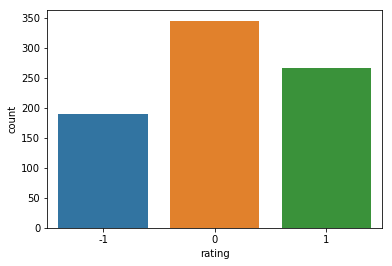

In [4]:
sns.countplot(x='rating', data=main)


# Preprocessing Data

We will convert marathi text to English and then train models on that. Which is done in the file "marathi_data_translated.csv"

In [5]:
data = pd.read_csv("../data/marathi_data_translated.csv")
data.head()

,Unnamed: 0,marathi,rating,english
0,0,तो पळाला हसत हसत,1,He ran away laughing
1,1,मी पडलो मला लागलं,-1,I fell
2,2,मला माहित आहे,0,I know
3,3,मी हरलो,-1,I lost
4,4,मी काम करतोय,0,I am working


In [6]:
data = data[["marathi","english","rating"]]
data.rename(columns = {'rating':'sentiments'}, inplace = True) 
data.head()

,marathi,english,sentiments
0,तो पळाला हसत हसत,He ran away laughing,1
1,मी पडलो मला लागलं,I fell,-1
2,मला माहित आहे,I know,0
3,मी हरलो,I lost,-1
4,मी काम करतोय,I am working,0


In [7]:
data['english']=data['english'].str.lower()
data['english']=data['english'].str.replace('\W+'," ")
data.head()

,marathi,english,sentiments
0,तो पळाला हसत हसत,he ran away laughing,1
1,मी पडलो मला लागलं,i fell,-1
2,मला माहित आहे,i know,0
3,मी हरलो,i lost,-1
4,मी काम करतोय,i am working,0


## Removing Stopwords

In [8]:
removed_stop_words = []
for i in data['english']:
    removed_stop_words.append(' '.join([word for word in i.split() if word not in stop]))
data['removed_stopwords'] = removed_stop_words

print(data.head())

             marathi               english  sentiments  removed_stopwords
0   तो पळाला हसत हसत  he ran away laughing           1  ran away laughing
1  मी पडलो मला लागलं                i fell          -1               fell
2      मला माहित आहे                i know           0               know
3            मी हरलो                i lost          -1               lost
4       मी काम करतोय          i am working           0            working


# Training NLP models

### Creating Features for Training the NLP model

In [9]:
x = data.iloc[:, 3].values # Sentences translated from marathi
y = data.iloc[:, 2].values # Sentiment Classes (Sad (-1) Neutral (0) Happy (1))

In [10]:
tfidfconverter = TfidfVectorizer(max_features=200, min_df=1, max_df=0.10)  
x = tfidfconverter.fit_transform(data['removed_stopwords']).toarray()

### Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=200)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(520, 200) (280, 200) (520,) (280,)


### Logistic Regression Model

In [12]:
def LR(x_train, x_test, y_train, y_test):
    reg = LogisticRegression()   
    reg = reg.fit(x_train, y_train) 
    pickle.dump(reg,open('models/lr.pkl','wb'))
    y_pred = reg.predict(x_test) 
    return y_pred

### Decision Tree Model

In [13]:
def DT(x_train, x_test, y_train, y_test):
    tree = DecisionTreeClassifier()
    tree = tree.fit(x_train, y_train)
    pickle.dump(tree,open('models/dt.pkl','wb'))
    y_pred = tree.predict(x_test)
    return y_pred

### Gaussian Naive Bayes Model

In [14]:
def GNB(x_train, x_test, y_train, y_test):
    gnb = GaussianNB()
    gnb = gnb.fit(x_train, y_train)
    pickle.dump(gnb,open('models/gnb.pkl','wb'))
    y_pred = gnb.predict(x_test)
    return y_pred

### k- Nearest Neighbours Model

In [15]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
    knn.fit(x_train, y_train)
    pickle.dump(knn,open('models/knn.pkl','wb'))
    y_pred = knn.predict(x_test)
    return y_pred

### Random Forest Classifier Model

In [16]:
def RFC(x_train, x_test, y_train, y_test):
    rfc_classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
    rfc_classifier = rfc_classifier.fit(x_train, y_train)
    pickle.dump(rfc_classifier,open('models/rfc.pkl','wb'))
    y_pred = rfc_classifier.predict(x_test)
    return y_pred

### Support Vector Machine Model

In [17]:
def SVM(x_train, x_test, y_train, y_test):
    svc_classifier = SVC(kernel='linear')
    svc_classifier = svc_classifier.fit(x_train, y_train)
    pickle.dump(svc_classifier,open('models/svm.pkl','wb'))
    y_pred = svc_classifier.predict(x_test)
    return y_pred

### Creating Models

In [18]:
ml_classifiers = ['Logistic Regression Model','Decision Tree Model','Gaussian Naive Bayes Model','KNN Model','Random Forest Model','SVM Model']
function_list = [LR,DT,GNB,KNN,RFC,SVM]
tabulating = []

In [19]:
for i in range(len(ml_classifiers)):
    print("======================================================================================")
    print(f"Creating {ml_classifiers[i]}")
    y_pred = function_list[i](x_train, x_test, y_train, y_test)
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))  
    acc = accuracy_score(y_test, y_pred)*100
    tabulating.append([ml_classifiers[i],acc])
    print(f"{ml_classifiers[i]} Accuracy >>>> {acc}")
    print("======================================================================================")
    print("")

Creating Logistic Regression Model
[[10 51  7]
 [ 1 96 13]
 [ 2 53 47]]
              precision    recall  f1-score   support

          -1       0.77      0.15      0.25        68
           0       0.48      0.87      0.62       110
           1       0.70      0.46      0.56       102

   micro avg       0.55      0.55      0.55       280
   macro avg       0.65      0.49      0.47       280
weighted avg       0.63      0.55      0.51       280

Logistic Regression Model Accuracy >>>> 54.64285714285714

Creating Decision Tree Model
[[19 44  5]
 [17 79 14]
 [ 4 49 49]]
              precision    recall  f1-score   support

          -1       0.47      0.28      0.35        68
           0       0.46      0.72      0.56       110
           1       0.72      0.48      0.58       102

   micro avg       0.53      0.53      0.53       280
   macro avg       0.55      0.49      0.50       280
weighted avg       0.56      0.53      0.52       280

Decision Tree Model Accuracy >>>> 52.5

C

c:\users\my1\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\my1\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNN Model Accuracy >>>> 41.42857142857143

Creating Random Forest Model
[[21 41  6]
 [10 83 17]
 [ 6 46 50]]
              precision    recall  f1-score   support

          -1       0.57      0.31      0.40        68
           0       0.49      0.75      0.59       110
           1       0.68      0.49      0.57       102

   micro avg       0.55      0.55      0.55       280
   macro avg       0.58      0.52      0.52       280
weighted avg       0.58      0.55      0.54       280

Random Forest Model Accuracy >>>> 55.00000000000001

Creating SVM Model
[[17 45  6]
 [ 3 92 15]
 [ 2 48 52]]
              precision    recall  f1-score   support

          -1       0.77      0.25      0.38        68
           0       0.50      0.84      0.62       110
           1       0.71      0.51      0.59       102

   micro avg       0.57      0.57      0.57       280
   macro avg       0.66      0.53      0.53       280
weighted avg       0.64      0.57      0.55       280

SVM Model Accuracy >

# Tabulating our final results

In [20]:
from tabulate import tabulate

In [21]:
headers = ["Models", "Accuracy"]
print(tabulate(tabulating,headers=headers))

Models                        Accuracy
--------------------------  ----------
Logistic Regression Model      54.6429
Decision Tree Model            52.5
Gaussian Naive Bayes Model     46.0714
KNN Model                      41.4286
Random Forest Model            55
SVM Model                      57.5


# Testing on the saved models


In [22]:
from googletrans import Translator
tr = Translator()
inp = input("Enter a statement in marathi >>>> ")
eng = tr.translate(inp).text
eng = eng.lower().replace('\W+'," ")

removed_stopword = []
for word in eng.split(): 
    if word not in stop:
        removed_stopword.append(word)

eng = np.array([" ".join(removed_stopword)])
eng

Enter a statement in marathi >>>> मी शर्यत जिंकली


array(['won race'], dtype='<U8')

In [23]:
x = tfidfconverter.transform(eng).toarray()
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
models = ['lr.pkl','dt.pkl','gnb.pkl','knn.pkl','rfc.pkl','svm.pkl']
for i in models:
    model=pickle.load(open('models/'+i,'rb'))
    print(i, " " ,model.predict(x))

lr.pkl   [1]
dt.pkl   [1]
gnb.pkl   [-1]
knn.pkl   [0]
rfc.pkl   [1]
svm.pkl   [1]


# Saving the tfidf vector model for frontend

In [25]:
pickle.dump(tfidfconverter,open('models/tfidf.pkl','wb'))

# SVM seems to be the best choice after testing, Hence that will be used on the front end.
